# 18.06 problem set 5

Due Wednesday, October 10, at 10:55am via Stellar.

## Problem 1 (12 points)

In pset 4, problem 4, you considered the matrix
$$
A = \begin{pmatrix} 0 & 1 & 2 & 3 & 4 \\ 0 & 1 & 2 & 4 & 6 \\ 0 & 0 & 0 & 1 & 2 \end{pmatrix}
$$

**(a)** Find a basis for the *row space* $C(A^T)$.

**(b)** Find a basis for the left nullspace $N(A^T)$. Use the fact that $N(A^T) = C(A)^\perp$ to obtain a condition for $Ax=c$ to be solvable for a vector $c = \begin{pmatrix} c_1 \\ c_2 \\ c_3 \end{pmatrix}$.

**(c)** In pset 4, you considered the vector $b = \begin{pmatrix} 3 \\ 6 \\ \beta \end{pmatrix}$ and found that $Ax=b$ only had a solution if $\beta = 3$.  Check that this condition also follows from your answer in (b).

## Problem 2 (10 points)

The set of $2\times 2$ real matrices form a vector space $\mathbb{R}^{2\times2}$.  One possible basis for this vector space is the following set of 4 matrices:
$$
M_1 = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}, \;
M_2 = \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix}, \;
M_3 = \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}, \;
M_4 = \begin{pmatrix} 0 & 0 \\ 0 & 1 \end{pmatrix}.
$$
That is, we can write any $A \in \mathbb{R}^{2\times2}$ as $A = a_1 M_1 + a_2 M_2 + a_3 M_3 + a_4 M_4$ for $a = \begin{pmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{pmatrix}$: representing **matrices** $A$ by **vectors** $a \in \mathbb{R}^4$!

Given any $2\times 2$ matrices
$$
B = \begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}, \;
C = \begin{pmatrix} c_{11} & c_{12} \\ c_{21} & c_{22} \end{pmatrix},
$$
we can define a **linear transformation** $T(A) = BAC$ that takes a matrix $A \in \mathbb{R}^{2\times2}$ and gives you another matrix in $\mathbb{R}^{2\times2}$.

**(a)** Write this $T(A)$ using the basis $\{ M_1, M_2, M_3, M_4 \}$ as a *single matrix* $D$ multipying the vector $a$ corresponding to $A$.   Start by expressing your $D$ as the *product of two matrices* (one representing multipling on the left by $B$ and the other representing multiplying on the right by $C$), and *then* multiply them to give a formula for $D$.

**(b)** In Julia, you can get $a$ from $A$ by `a = vec(A)`.  For the example matrices given below, fill in `D` and check your answer from (a): check that `vec(B*A*C) = D*vec(A)`.

**Extra credit (5 points):** Look up [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product) online, and show that $D$ can be written in terms of a Kronecker product involving $B$ and $C$.  Check your answer in Julia using the `kron(X,Y)` function (which computes the Kronecker product $X \otimes Y$) to see that it matches your $D$ from above.

In [1]:
B = [1 2
     3 4]
C = [2 -1
     1  3]
T(A) = B * A * C  # our linear transformation

T (generic function with 1 method)

In [2]:
A = [7  14
     23 11]  # example matrix A

2×2 Array{Int64,2}:
  7  14
 23  11

In [3]:
a = vec(A)   # the corresponding vector in our basis M₁,M₂,M₃,M₄

4-element Array{Int64,1}:
  7
 23
 14
 11

In [4]:
D = [ 2  4  1  2
      6  8  3  4
     -1 -2  3  6
     -3 -4  9 12 ]  # fill this in

4×4 Array{Int64,2}:
  2   4  1   2
  6   8  3   4
 -1  -2  3   6
 -3  -4  9  12

In [5]:
D = kron(transpose(C), B)

4×4 Array{Int64,2}:
  2   4  1   2
  6   8  3   4
 -1  -2  3   6
 -3  -4  9  12

Check that these match:

In [6]:
vec(T(A))

4-element Array{Int64,1}:
 142
 312
  55
 145

In [7]:
D*a

4-element Array{Int64,1}:
 142
 312
  55
 145

## Problem 3 (15 points)

In this problem you will solve a nonlinear system of equations by the multidimensional Newton algorithm.

In particular, consider the system of equations $f(x) = 0$ where $x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \in \mathbb{R}^2$ and
$$
f(x) = \begin{pmatrix} \frac{1}{2}\sin(x_1 x_2) - \frac{x_2}{4\pi} - \frac{x_1}{2} \\ \left(1 - \frac{1}{4\pi}\right) \left(e^{2x_1 - 1} - 1\right) + \frac{x_2}{\pi} - 2x_1 \end{pmatrix}
$$
(This is a well known test problem from a 1966 PhD thesis by K. M. Brown at Purdue.)

**(a)** Write a function `f(x) = [something, something]` in Julia that implements this $f$.   Note that $x_1$ and $x_2$ are `x[1]` and `x[2]` in Julia, and there is a function `exp(x)` for $e^x$ as well as `expm1(x)` for $e^x - 1$.  The constant $\pi$ is defined in Julia as `pi` or `π`.

In [5]:
f(x) = [ (1 / 2) * sin(x[1] * x[2]) - (x[2] / (4 * pi)) - (x[1] / 2),
         (1 - (1 / (4 * pi))) * expm1(2 * x[2] - 1) + (x[2] / pi) - 2 * x[1] ]

f (generic function with 1 method)

**(b)** Run `Pkg.add("ForwardDiff")` to install the [ForwardDiff package](https://github.com/JuliaDiff/ForwardDiff.jl), and use it to define a Jacobian function `J(x) = ForwardDiff.jacobian(f, x)` function that computes the Jacobian matrix.   Compute **one entry** of the Jacobian matrix by **hand** and check that it matches `J(x)` for some point `x`.

In [6]:
using ForwardDiff

In [7]:
J(x) = ForwardDiff.jacobian(f, x)

J (generic function with 1 method)

In [8]:
J([1,2])  # check the Jacobian matrix for some point, e.g. x = (1,2)

2×2 Array{Float64,2}:
 -0.916147  -0.287651
 -2.0       37.2927  

**(c)** Run the following code to plot your $\Vert f(x) \Vert$ in order to get a picture of where some of its roots (white spots) are:

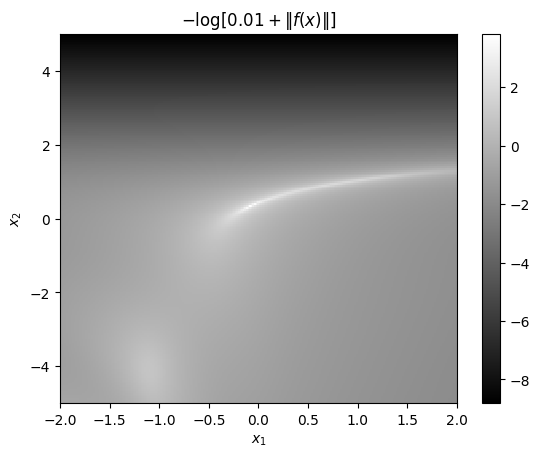

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc3a862ec90>

In [25]:
using PyPlot
X = linspace(-2,2,250)
Y = linspace(-5,5,200)
pcolor(X', Y, [-log(0.01 + norm(f([x,y]))) for y in Y, x in X], cmap="gray")
xlabel(L"x_1")
ylabel(L"x_2")
title(L"-\log [ 0.01 + \Vert f(x) \Vert]")
colorbar()

**(d)** Pick one of the roots that you see on the plot and set `x` to be roughly the location of the root.  Run a few Newton iterations `x = x - J(x) \ f(x)`.   How many iterations do you need for the length $\Vert f(x) \Vert$, computed via `norm(f(x))` in Julia, to become less than $10^{-10}$?

In [9]:
x = [0, 0]  # initial guess

# run 100 Newton iterations and print ‖f(x)‖
for i = 1:100
    x = x - J(x) \ f(x)
    println("iteration $i residual ‖f(x)‖ = ", norm(f(x)))
end

iteration 1 residual ‖f(x)‖ = 0.18315911755082642
iteration 2 residual ‖f(x)‖ = 0.017151190834714784
iteration 3 residual ‖f(x)‖ = 4.216377139358071e-5
iteration 4 residual ‖f(x)‖ = 2.759961472397255e-9
iteration 5 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 6 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 7 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 8 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 9 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 10 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 11 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 12 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 13 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 14 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 15 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 16 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 17 residual ‖f(x)‖ = 5.551115123125783e-17
iteration 18 residual ‖f(x)‖ = 2.8609792490763984e-17
iteration 19 residual ‖f(x)‖ = 5.551115123125783e-17


**(e)** Newton's method converges very rapidly *if* you start out close to the root.  However, if you start out farther away, it can jump around unpredictably, and *which* root it converges (in problems like this with multiple roots) to can be quite surprising.

Run the following code, which runs 20 Newton iterations for many different starting points in the $(x_1, x_2)$ plane and plots the final $x_1$, to see this behavior.  (It might be interesting to change the `X` and `Y` limits to zoom in on different portions of the plot.)

You should see an instance of a [Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal).

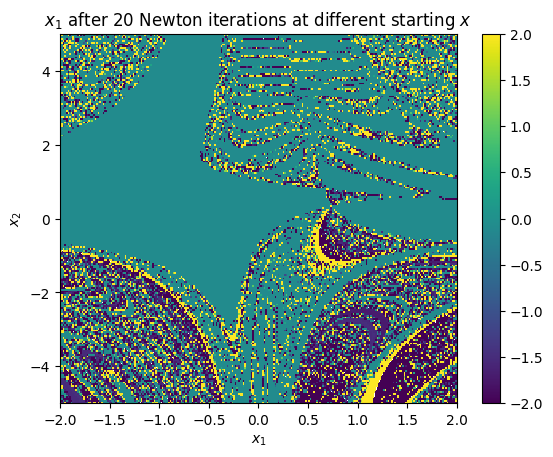

PyObject Text(0.5,1,'$x_1$ after 20 Newton iterations at different starting $x$')

In [32]:
function newtoniters(x, N=20) 
    for i = 1:N
        y = f(x)
        norm(y) < 1e-10 && break # converged
        x = x - J(x) \ y
    end
    return x
end

X = linspace(-2,2,250)
Y = linspace(-5,5,200)
pcolor(X', Y, [newtoniters([x,y])[1] for y in Y, x in X], vmin=-2, vmax=2)
xlabel(L"x_1")
ylabel(L"x_2")
colorbar()
title(L"$x_1$ after 20 Newton iterations at different starting $x$")

## Problem 4 (10 points)

(Based on Strang, section 4.1, problem 9.)

The following is an important property of the very important matrix $A^T A$ (for real matrices) that will come up several times in 18.06:

* If $A^TAx=0$ then $Ax=0$.  Reason: If $A^TAx=0$, then $Ax$ is in the nullspace of $A^T$ and also in the ?????? of $A$, and those spaces are ???????.  Conclusion: $N(A^T A) = N(A)$.

* Alternative proof: $A^TAx=0$, then $x^T A^T Ax = 0 = (Ax)^T (Ax)$.  Why does this imply that $Ax=0$?   (Hint: if $y^Ty = 0$, can we have $y\ne 0$?)

## Problem 5 (10 points)

(From Strang, section 3.5, problem 4)

Construct matrices with each of the following properties, or explain why it is impossible:

* Column space contains $\begin{pmatrix} 1\\1\\0 \end{pmatrix}$, $\begin{pmatrix} 0\\0\\1 \end{pmatrix}$, and row space contains $\begin{pmatrix} 1\\2 \end{pmatrix}$, $\begin{pmatrix} 2 \\5 \end{pmatrix}$

* Column space has basis $\begin{pmatrix} 1\\1\\3 \end{pmatrix}$, nullspace has basis $\begin{pmatrix} 3\\1\\1 \end{pmatrix}$

* Dimension of nullspace = 1 + dimension of left nullspace

* Nullspace contains $\begin{pmatrix} 1\\3 \end{pmatrix}$, column space contains $\begin{pmatrix} 3\\1 \end{pmatrix}$

* Row space = column space, nullspace ≠ left nullspace.

## Problem 6 (5 points)

(From Strang, section 4.1, problem 18.)

Suppose S is spanned by (1,7,3) and (1,1,1).  Then $S^\perp$ is the nullspace of what matrix?

## Problem 7 (10 points)

If a subspace $S$ is contained in a subspace $V$ ($S \subseteq V$), then which of the following *must* be true?

* $S^\perp$ contains $V^\perp$

or

* $V^\perp$ contains $S^\perp$

?  Why?